# match_to_profile
This module performs match analysis to find genes or features that match a given phenotype best.

<div class="alert alert-info">
For example, you could use this module to find genes whose expression levels match and oppose a specific gene expression for a given set of samples. In this notebook we will use gene M89957_at [IGB Immunoglobulin-associated beta (B29)] as the profile to match.

A note on some of the parameters we are using:
- **gene expression**: We use the classic ALL/AML microarray dataset http://datasets.genepattern.org/all_aml/all_aml_test.gct

- **phenotype input method**: We use the default value **Index**. GCT files are by default indexed by their first column (which should containe gene name).

- **phenotype file**: We leave this blank because in this example we are not using a CLS file to identify the samples' phenotype.

- **name of phenotype to match**: Within the GCT file we provide we will use the gene **M89957_at**.

In [1]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import match_to_profile
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(match_to_profile, name="Differential gene expression, continous pheotype.", 
                        description="Sort genes according to their association with a continuous phenotype or class vector.",
                        parameters={
                            "phenotype_input_method":{"description":"Select from the dropdown the type of input you have provided",
                                                      "default": "Index",
                                                      "choices":{'CLS --> Fill out the "phenotype file" parameter':"CLS",
                                                                 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters':"Name",
                                                                 'Index --> Fill out the "name of phenotype to match" parameter with value of index':"Index"
                                                                }
                                                     },
                            "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

A Jupyter Widget

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x112a94d90> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


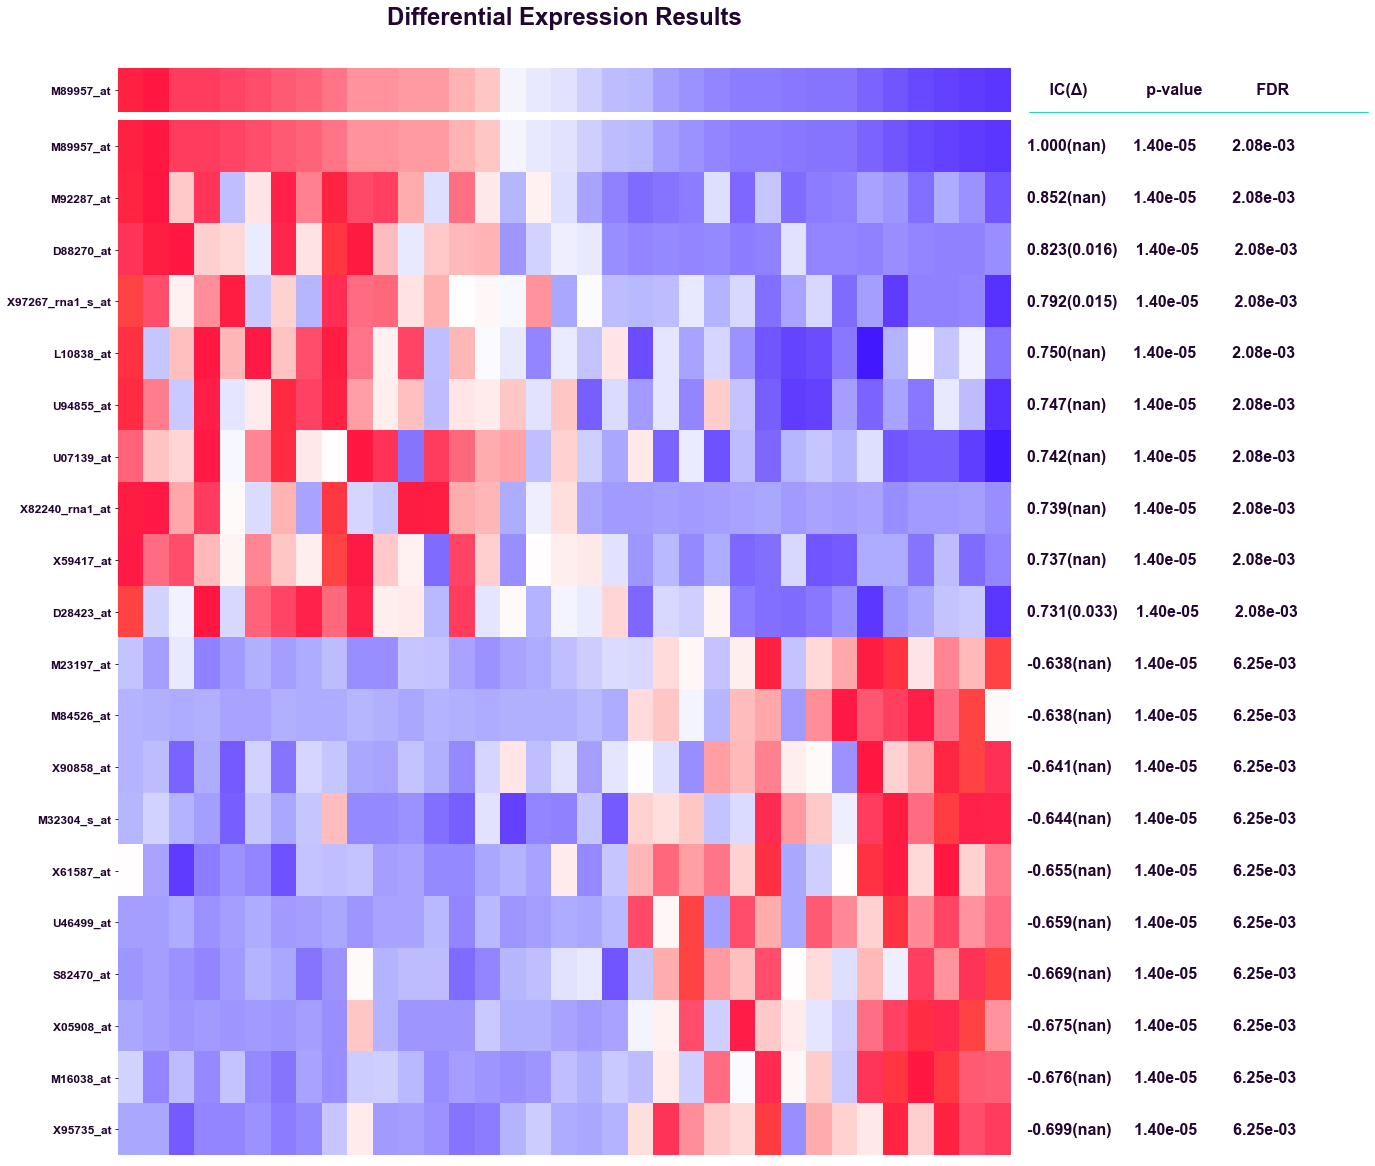

In [2]:
diffex_results = match_to_profile(gene_expression="http://datasets.genepattern.org/all_aml/all_aml_test.gct", phenotype_input_method="Index", phenotypes_file="", phenotype_column="Index", name_of_phenotype_to_match="M89957_at", output_filename="", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)